In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install tensorflow;
dataset=pd.read_csv('Almond.csv',dtype={'Length':float})
col_names=dataset.columns
dataset=dataset[col_names[1::]]
dataset=dataset.drop(index=0)
features=dataset[col_names[1:-1]]
targets=dataset[col_names[-1]]

##For imputation of data, i chose to put a 0 . The scaling of the dataset will be form -1 to 1  and the type column will be
## encoded to a integer -1,0,1 for the three types of almonds. The idea behind using -1 to 1 is to ensure 0 centering of inputs and 
##outputs to successive activation functions and nodes in the NN to minimize biases etc . It also conventinetly provides
##a numerically neutral value for unknowns hence the NN can intepret that information as not adding value (unknown). 
##additionally, we adjust -1 and 1 to -0.9 and 0.9. This is for the activation functions, to help minimize saturation and 
##the optimizer chasing gradients when we know it is sufficiently close to the answer to make a choice. Furthermore, looking at 
## the data generated from formulas, if any of the parameters are 0 then the function would evaulate to either 0 ,1, undefined, inf
## practically, we would only work with values that give numerical values hence using 0 is reaosnable as it represents
## no 'activation' of that specific feature due to non activation of the determining features.
targets=np.array(targets)
for i in range(len(targets)):
    if targets[i]=='MAMRA':
        targets[i]=-0.9
    if targets[i]=='REGULAR':
        targets[i]=0
    if targets[i]=='SANORA':
        targets[i]=0.9      
        
train_feat,test_feat,train_targ,test_targ=train_test_split(features,targets,test_size=0.15)
train_feat,valid_feat,train_targ,valid_targ=train_test_split(train_feat,train_targ,test_size=0.18)##final rations: 0.7,0.15,0.15
def scaler(array):
    low=np.min(array)
    up=np.max(array)
    for i in range(len(array)):
        array[i]=-0.9+(((array[i]-low)*(0.9+0.9))/(up-low))
    return array,low,up
def trained_scaler(array,low,up):
    for i in range(len(array)):
        array[i]=-0.9+(((array[i]-low)*(0.9+0.9))/(up-low))
    return array
feat_lows=[]
feat_highs=[]
col_names=train_feat.columns
for ind in range(len(col_names)):
    array=np.array(train_feat[col_names[ind]].values)
    replacement,low,up=scaler(array)
    feat_lows.append(low)
    feat_highs.append(up)
    train_feat[col_names[ind]]=replacement
for ind in range(len(col_names)):
    array=np.array(valid_feat[col_names[ind]].values)
    array2=np.array(test_feat[col_names[ind]].values)
    replacement=trained_scaler(array,feat_lows[ind],feat_highs[ind])
    replacement2=trained_scaler(array2,feat_lows[ind],feat_highs[ind])
    valid_feat[col_names[ind]]=replacement
    test_feat[col_names[ind]]=replacement2
###Finally, we split the training data
train_feat

,Length,Width,Thickness,Area,Perimeter,Roundness,Solidity,Compactness,AspectRatio,Eccentricity,Extent,Convex hull
939,-0.055567,-0.900000,0.131486,-0.601020,-0.442068,0.216965,0.741737,-0.762070,-0.900000,-0.900000,0.391748,-0.597831
1657,0.032718,-0.900000,0.487473,-0.394218,-0.383637,0.456260,0.848778,-0.850273,-0.900000,-0.900000,0.374664,-0.397773
668,0.106586,0.275601,-0.900000,-0.207840,-0.293098,0.605722,0.867822,-0.869575,0.224629,0.667311,0.545030,-0.213283
801,-0.900000,0.322434,0.343872,-0.655077,-0.628796,-0.900000,0.786392,-0.878346,-0.900000,-0.900000,0.296362,-0.655608
1586,-0.900000,0.557806,-0.112168,-0.748272,-0.633352,-0.900000,0.779168,-0.794614,-0.900000,-0.900000,-0.008779,-0.749647
...,...,...,...,...,...,...,...,...,...,...,...,...
1785,-0.117643,-0.016967,-0.900000,-0.550249,-0.498401,0.555127,0.847464,-0.846692,0.263775,0.694197,0.442526,-0.554095
1909,-0.072919,0.125520,-0.900000,-0.445162,-0.434036,0.686778,0.794929,-0.859151,0.159320,0.614313,0.493778,-0.443922
135,0.458774,-0.900000,0.145206,-0.362714,0.105884,-0.229356,0.236738,-0.479069,-0.900000,-0.900000,0.165858,-0.296227
2237,-0.900000,0.178132,0.210496,-0.735482,-0.709893,-0.900000,0.830390,-0.883347,-0.900000,-0.900000,0.294938,-0.739065


In [52]:
##converting targets to binary 

bi_train_targ=np.zeros((len(train_targ),3))
for ind in range(len(train_targ)):
    if train_targ[ind]==-0.9:
        bi_train_targ[ind,:]=[0.9,0,0]
    if train_targ[ind]==0:
        bi_train_targ[ind,:]=[0,0.9,0]
    if train_targ[ind]==0.9:
        bi_train_targ[ind,:]=[0,0,0.9]

bi_valid_targ=np.zeros((len(valid_targ),3))
for ind in range(len(valid_targ)):
    if valid_targ[ind]==-0.9:
        bi_valid_targ[ind,:]=[0.9,0,0]
    if valid_targ[ind]==0:
        bi_valid_targ[ind,:]=[0,0.9,0]
    if valid_targ[ind]==0.9:
        bi_valid_targ[ind,:]=[0,0,0.9]
bi_test_targ=np.zeros((len(test_targ),3))
for ind in range(len(test_targ)):
    if test_targ[ind]==-0.9:
        bi_test_targ[ind,:]=[0.9,0,0]
    if test_targ[ind]==0:
        bi_test_targ[ind,:]=[0,0.9,0]
    if test_targ[ind]==0.9:
        bi_test_targ[ind,:]=[0,0,0.9]

In [53]:
import tensorflow as tf
inputs_training = tf.convert_to_tensor(train_feat.values, dtype=tf.float32)
labels_training = tf.convert_to_tensor(bi_train_targ, dtype=tf.float32)
inputs_valid = tf.convert_to_tensor(valid_feat.values, dtype=tf.float32)
labels_valid = tf.convert_to_tensor(bi_valid_targ, dtype=tf.float32)
train_feat=np.array(train_feat)
valid_feat=np.array(train_feat)

36


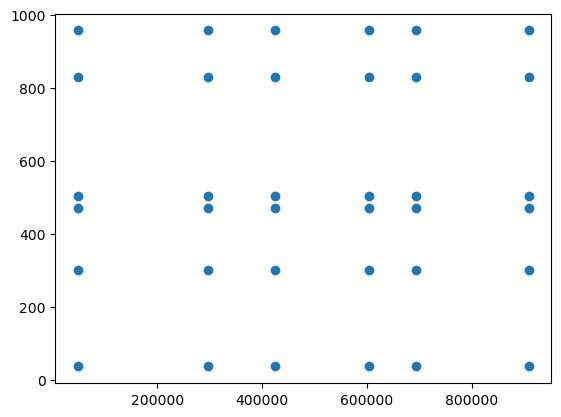

In [70]:
from scipy.stats import qmc
hyper=qmc.LatinHypercube(d=2)
samples=hyper.random(6)
upper=[1e6,1000]
lower=[1,1]
scaled=qmc.scale(samples,lower,upper)
X,Y=np.meshgrid(scaled[:,0],scaled[:,1])
print(len(X.flatten()))
plt.scatter(X,Y) ###Remeber to mulitply each x value by 1e-7 before actually using anywhere

Text(0, 0.5, 'Learning rate')

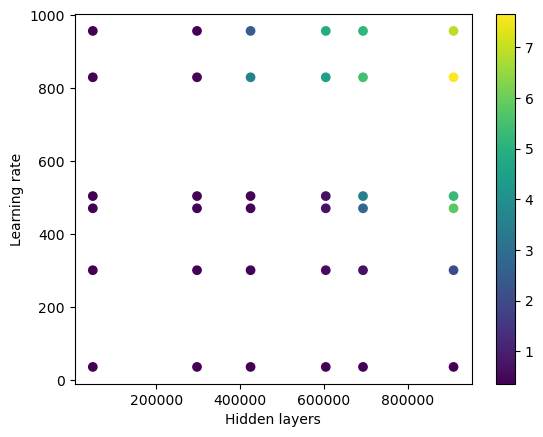

In [91]:
###for sigmoid activation

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_sig_loss = np.zeros((len(X), len(X)))
grid_sig_acc = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=int(Y[indA,indH]), output_activation='sigmoid')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=X[indA,indH]*1e-7),
                      loss=loss_func,
                      metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=1000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_sig_loss[indA,indH] = np.mean(batch_loss)
        grid_sig_acc[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_sig_loss, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')



In [95]:
ind=np.argmin(grid_sig_loss.flatten())
print(X.flatten()[ind],Y.flatten()[ind])

48028.291434851526 830.2324853322485


Text(0, 0.5, 'Learning rate')

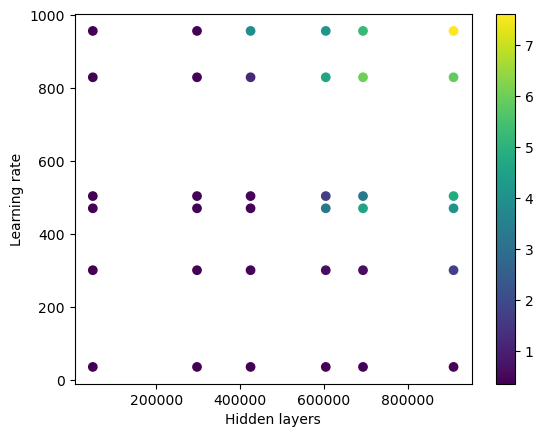

In [74]:
###for sigmoid activation

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_sig_loss2 = np.zeros((len(X), len(X)))
grid_sig_acc2 = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=int(Y[indA,indH]), output_activation='sigmoid')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=X[indA,indH]*1e-7),
                      loss=loss_func,
                      metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=1000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_sig_loss2[indA,indH] = np.mean(batch_loss)
        grid_sig_acc2[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_sig_loss2, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')



48028.291434851526 36.831494228337554


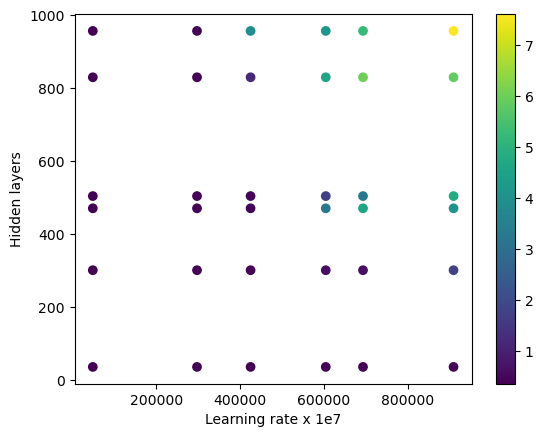

In [78]:
plt.scatter(X, Y, c=grid_sig_loss2, cmap='viridis')  
plt.colorbar()       
plt.ylabel('Hidden layers')
plt.xlabel('Learning rate x 1e7')
ind=np.argmin(grid_sig_loss2.flatten())
print(X.flatten()[ind],Y.flatten()[ind])

Text(0, 0.5, 'Learning rate')

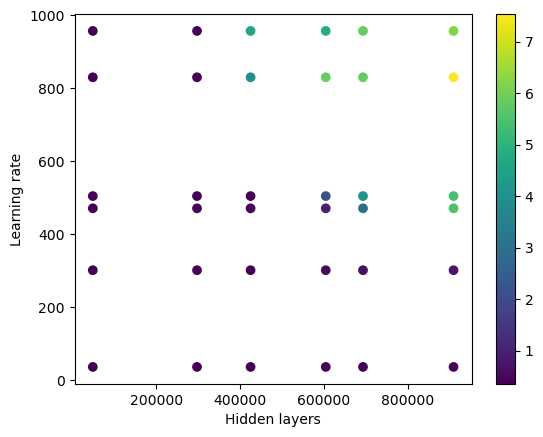

In [79]:
###for sigmoid activation

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_sig_loss3 = np.zeros((len(X), len(X)))
grid_sig_acc3 = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=int(Y[indA,indH]), output_activation='sigmoid')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=X[indA,indH]*1e-7),
                      loss=loss_func,
                      metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=1000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_sig_loss3[indA,indH] = np.mean(batch_loss)
        grid_sig_acc3[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_sig_loss3, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')



48028.291434851526 36.831494228337554


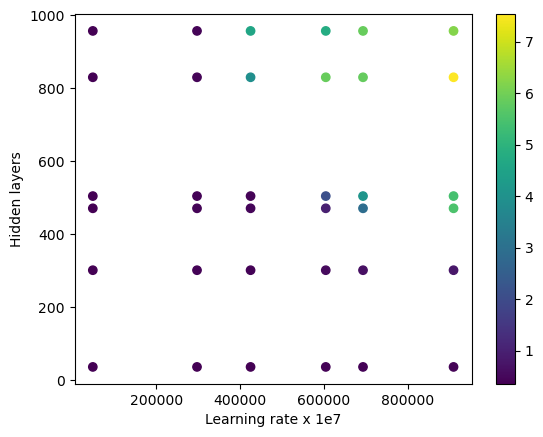

In [88]:
plt.scatter(X, Y, c=grid_sig_loss3, cmap='viridis')  
plt.colorbar()       
plt.ylabel('Hidden layers')
plt.xlabel('Learning rate x 1e7')
ind=np.argmin(grid_sig_loss2.flatten())
print(X.flatten()[ind],Y.flatten()[ind])

[[424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]] [[830.23248533 830.23248533 830.23248533 830.23248533 830.23248533
  830.23248533]
 [ 36.83149423  36.83149423  36.83149423  36.83149423  36.83149423
   36.83149423]
 [471.33205398 471.33205398 471.33205398 471.33205398 471.33205398
  471.33205398]
 [957.21972625 957.21972625 957.21972625 957.21972625 957.21972625
  957.21972625]
 [301.77438203 301.77438203 301.77438203 301.77438203 301.77438203


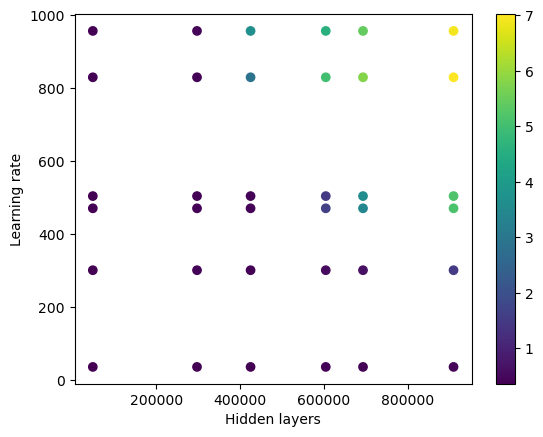

In [98]:
final_sigmoid=1/3*(grid_sig_loss+grid_sig_loss2+grid_sig_loss3)

plt.scatter(X, Y, c=final_sigmoid, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')
print(X,Y,final_sigmoid)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


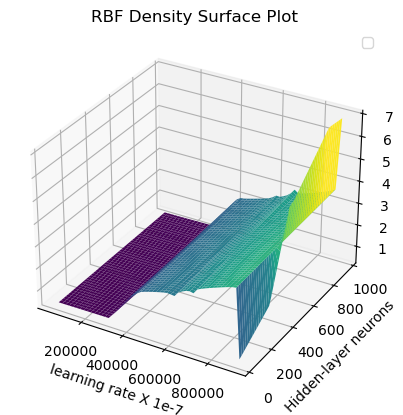

65596.93677367667 34.831494228337554


In [144]:
##for interpolation, its easier to just use scipy.interpolate , but could also do it as above to get the pdf values at the inteprolated points and then color them like that

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D


x_data = X
y_data = Y
z_data = final_sigmoid

# Fit RBF
rbf = Rbf(x_data, y_data, z_data,function='linear')  # You can choose 'linear', 'cubic', etc.

# Create grid for evaluation
grid_x, grid_y = np.linspace(np.min(x_data)-2, np.max(x_data)+2, 50), np.linspace(np.min(y_data)-2, np.max(y_data)+2, 50)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_z = rbf(grid_x, grid_y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')


ax.set_xlabel('learning rate X 1e-7')
ax.set_ylabel('Hidden-layer neurons')
ax.set_title('RBF Density Surface Plot')
plt.legend()
plt.show()
ind=np.argmin(grid_z.flatten())
print(grid_x.flatten()[ind],grid_y.flatten()[ind])

C:\Users\LenovoT480\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


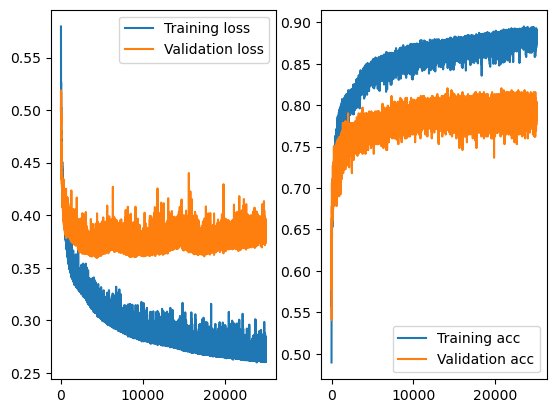

In [54]:

###NOW we train the semi-tuned simoid NN on average values( using mean value from raw samples provided better accuracy than 
##rbf interpolated point. Howveer, generalisation gap is similar in both cases)
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,),  
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=310, output_activation='sigmoid')
training_loss=[]
validation_loss=[]
training_acc=[]
validation_acc=[] 
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=48028.2914e-7),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=25000, 
                    verbose=0,batch_size=32)
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])
training_acc.append(history.history['accuracy'])
validation_acc.append(history.history['val_accuracy'])

plt.subplot(121)
plt.plot(np.linspace(0,25000,25000),np.array(training_loss).reshape(-1,1),label='Training loss')
plt.plot(np.linspace(0,25000,25000),np.array(validation_loss).reshape(-1,1),label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,25000,25000),np.array(training_acc).reshape(-1,1),label='Training acc')
plt.plot(np.linspace(0,25000,25000),np.array(validation_acc).reshape(-1,1),label='Validation acc')
plt.legend()

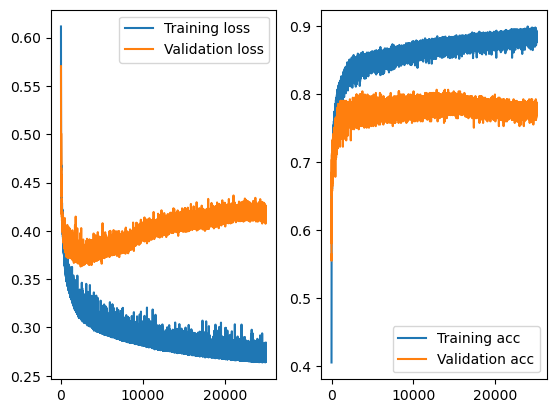

In [55]:
###using ideal values from linear interpolation

###NOW we train the semi-tuned simoid NN on average values( using mean value from raw samples provided better accuracy than 
##rbf interpolated point. Howveer, generalisation gap is similar in both cases)
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,),  
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=35, output_activation='sigmoid')
training_loss=[]
validation_loss=[]
training_acc=[]
validation_acc=[] 
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=65596.93677367667e-7),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=25000, 
                    verbose=0,batch_size=32)
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])
training_acc.append(history.history['accuracy'])
validation_acc.append(history.history['val_accuracy'])

plt.subplot(121)
plt.plot(np.linspace(0,25000,25000),np.array(training_loss).reshape(-1,1),label='Training loss')
plt.plot(np.linspace(0,25000,25000),np.array(validation_loss).reshape(-1,1),label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,25000,25000),np.array(training_acc).reshape(-1,1),label='Training acc')
plt.plot(np.linspace(0,25000,25000),np.array(validation_acc).reshape(-1,1),label='Validation acc')
plt.legend()

36


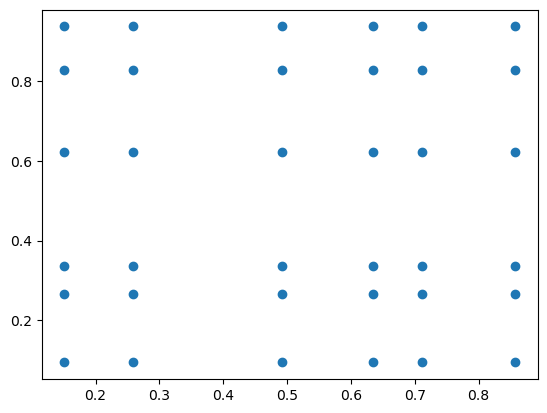

In [57]:
from scipy.stats import qmc
hyper=qmc.LatinHypercube(d=2)
samples=hyper.random(6)
upper=[1,1]
lower=[1e-3,1e-3]
scaled=qmc.scale(samples,lower,upper)
X,Y=np.meshgrid(scaled[:,0],scaled[:,1])
print(len(X.flatten()))
plt.scatter(X,Y)

In [58]:
###for sigmoid adam opt

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_sig_loss1 = np.zeros((len(X), len(X)))
grid_sig_acc1 = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=310, output_activation='sigmoid')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=48028.2914e-7,beta_1=X[indA,indH],beta_2=Y[indA,indH],amsgrad=False),
                      loss=loss_func, metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=2000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_sig_loss1[indA,indH] = np.mean(batch_loss)
        grid_sig_acc1[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_sig_loss1, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')
ind=np.argmin(grid_sig_loss1.flatten())
print(X.flatten()[ind],Y.flatten()[ind])



KeyboardInterrupt



In [25]:
print(grid_sig_loss1)

[[0.36797573 0.35463949 0.35712212 0.35479686 0.34314535 0.35004342]
 [0.3682281  0.37558117 0.37755353 0.37631789 0.36395101 0.37551671]
 [0.36272428 0.36060621 0.37542619 0.3584331  0.36212592 0.3677636 ]
 [0.37327341 0.35770775 0.3536241  0.37058529 0.36254073 0.36017212]
 [2.93858709 0.4124813  0.3796495  0.36010687 0.4578771  0.37549053]
 [0.37836683 0.37663421 0.36725296 0.36368917 0.35226351 0.37296823]]


0.9253553390649308 0.9699355269742888


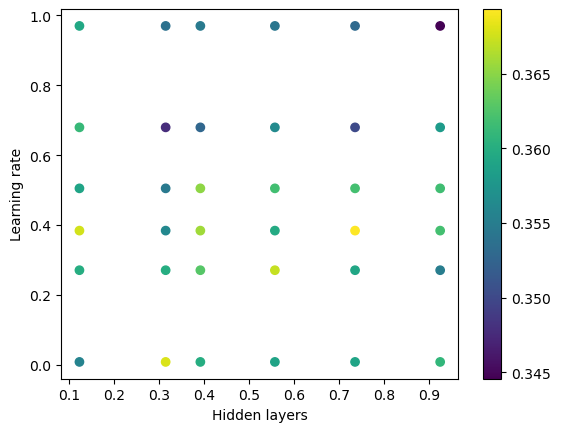

In [22]:
###for sigmoid adam opt

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_sig_loss2 = np.zeros((len(X), len(X)))
grid_sig_acc2 = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=35, output_activation='sigmoid')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=65596.93677368*1e-7,beta_1=X[indA,indH],beta_2=Y[indA,indH],amsgrad=True),
                      loss=loss_func, metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=3000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_sig_loss2[indA,indH] = np.mean(batch_loss)
        grid_sig_acc2[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_sig_loss2, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')
ind=np.argmin(grid_sig_loss2.flatten())
print(X.flatten()[ind],Y.flatten()[ind])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


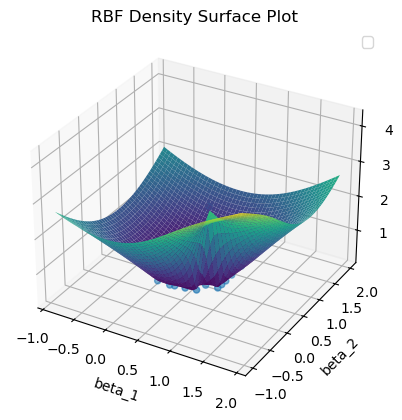

0.838518587915633 0.3984271570599476


In [28]:
##for sigmoid w/o amsgrad 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D


x_data = X
y_data = Y
z_data = grid_sig_loss1

# Fit RBF
rbf = Rbf(x_data, y_data, z_data,function='linear')  # You can choose 'linear', 'cubic', etc.

# Create grid for evaluation
grid_x, grid_y = np.linspace(np.min(x_data)-1, np.max(x_data)+1, 50), np.linspace(np.min(y_data)-1, np.max(y_data)+1, 50)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_z = rbf(grid_x, grid_y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.scatter(X,Y,grid_sig_loss1)

ax.set_xlabel('beta_1')
ax.set_ylabel('beta_2')
ax.set_title('RBF Density Surface Plot')
plt.legend()
plt.show()
ind=np.argmin(grid_z.flatten())
print(grid_x.flatten()[ind],grid_y.flatten()[ind])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


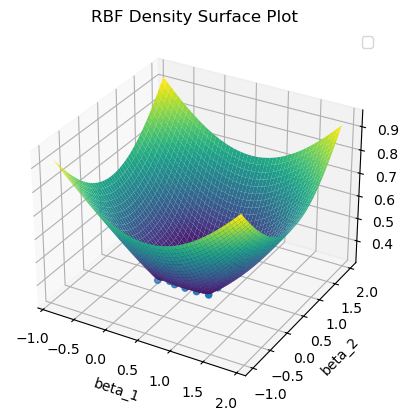

0.838518587915633 0.8819681939566679


In [29]:
##for sig with amsgrad 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D


x_data = X
y_data = Y
z_data = grid_sig_loss2

# Fit RBF
rbf = Rbf(x_data, y_data, z_data,function='linear')  # You can choose 'linear', 'cubic', etc.

# Create grid for evaluation
grid_x, grid_y = np.linspace(np.min(x_data)-1, np.max(x_data)+1, 50), np.linspace(np.min(y_data)-1, np.max(y_data)+1, 50)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_z = rbf(grid_x, grid_y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.scatter(X,Y,grid_sig_loss2)

ax.set_xlabel('beta_1')
ax.set_ylabel('beta_2')
ax.set_title('RBF Density Surface Plot')
plt.legend()
plt.show()
ind=np.argmin(grid_z.flatten())
print(grid_x.flatten()[ind],grid_y.flatten()[ind])


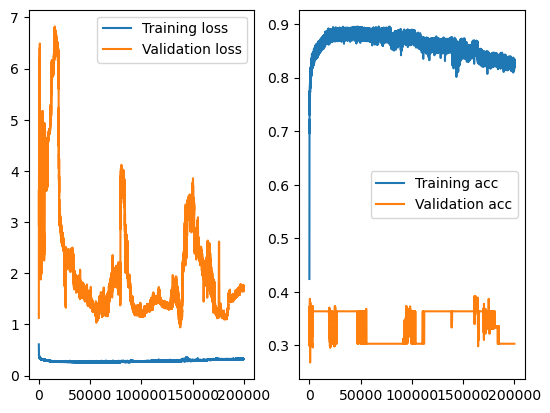

In [46]:
###Now training using linear interpolation results w/o amsgrad


import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,),  
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=35, output_activation='sigmoid')
training_loss=[]
validation_loss=[]
training_acc=[]
validation_acc=[] 
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=65596.93677367667e-7,beta_1=0.838518587915633 ,beta_2=0.3984271570599476,amsgrad=False),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=200000, 
                    verbose=0,batch_size=32)
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])
training_acc.append(history.history['accuracy'])
validation_acc.append(history.history['val_accuracy'])

plt.subplot(121)
plt.plot(np.linspace(0,200000,200000),np.array(training_loss).reshape(-1,1),label='Training loss')
plt.plot(np.linspace(0,200000,200000),np.array(validation_loss).reshape(-1,1),label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,200000,200000),np.array(training_acc).reshape(-1,1),label='Training acc')
plt.plot(np.linspace(0,200000,200000),np.array(validation_acc).reshape(-1,1),label='Validation acc')
plt.legend()

ERROR! Session/line number was not unique in database. History logging moved to new session 2


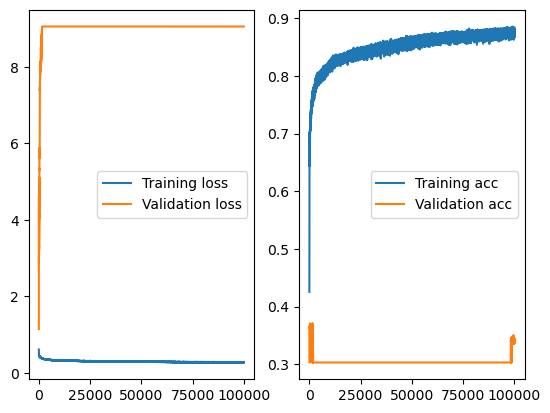

In [43]:
###Now training using interpolation search results w amsgrad


import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,),  
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=35, output_activation='sigmoid')
training_loss=[]
validation_loss=[]
training_acc=[]
validation_acc=[] 
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=65596.93677367667e-7,beta_1=0.838518587915633 ,beta_2=0.8819681939566679,amsgrad=True),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=100000, 
                    verbose=0,batch_size=32)
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])
training_acc.append(history.history['accuracy'])
validation_acc.append(history.history['val_accuracy'])

plt.subplot(121)
plt.plot(np.linspace(0,100000,100000),np.array(training_loss).reshape(-1,1),label='Training loss')
plt.plot(np.linspace(0,100000,100000),np.array(validation_loss).reshape(-1,1),label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,100000,100000),np.array(training_acc).reshape(-1,1),label='Training acc')
plt.plot(np.linspace(0,100000,100000),np.array(validation_acc).reshape(-1,1),label='Validation acc')
plt.legend()

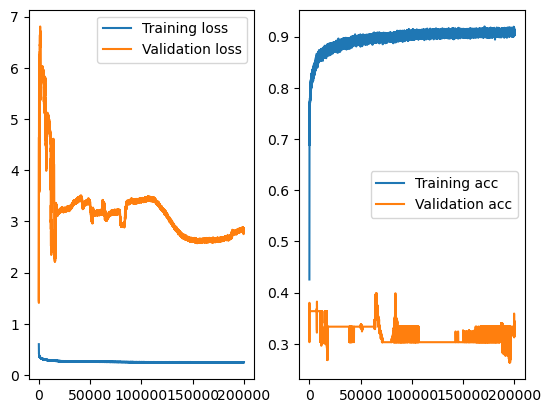

In [47]:
###Now training using grid search results w/o amsgrad


import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,),  
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=35, output_activation='sigmoid')
training_loss=[]
validation_loss=[]
training_acc=[]
validation_acc=[] 
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=65596.93677367667e-7,beta_1=0.7359064838213142,beta_2=0.969935526974288,amsgrad=False),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=200000, 
                    verbose=0,batch_size=32)
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])
training_acc.append(history.history['accuracy'])
validation_acc.append(history.history['val_accuracy'])

plt.subplot(121)
plt.plot(np.linspace(0,200000,200000),np.array(training_loss).reshape(-1,1),label='Training loss')
plt.plot(np.linspace(0,200000,200000),np.array(validation_loss).reshape(-1,1),label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,200000,200000),np.array(training_acc).reshape(-1,1),label='Training acc')
plt.plot(np.linspace(0,200000,200000),np.array(validation_acc).reshape(-1,1),label='Validation acc')
plt.legend()

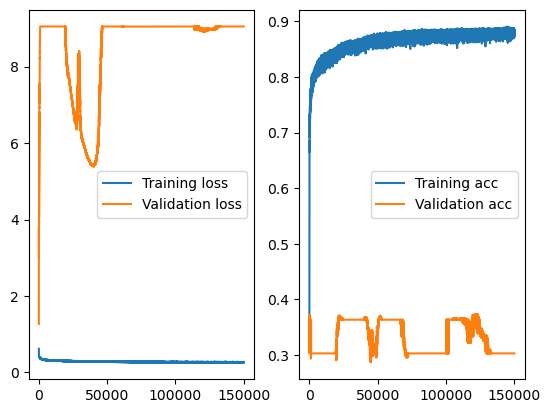

In [48]:
###Now training using grid search results w amsgrad


import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,),  
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=35, output_activation='sigmoid')
training_loss=[]
validation_loss=[]
training_acc=[]
validation_acc=[] 
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=65596.93677367667e-7,beta_1=0.9253553390649308 ,beta_2=0.9699355269742888,amsgrad=True),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=150000, 
                    verbose=0,batch_size=32)
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])
training_acc.append(history.history['accuracy'])
validation_acc.append(history.history['val_accuracy'])

plt.subplot(121)
plt.plot(np.linspace(0,150000,150000),np.array(training_loss).reshape(-1,1),label='Training loss')
plt.plot(np.linspace(0,150000,150000),np.array(validation_loss).reshape(-1,1),label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,150000,150000),np.array(training_acc).reshape(-1,1),label='Training acc')
plt.plot(np.linspace(0,150000,150000),np.array(validation_acc).reshape(-1,1),label='Validation acc')
plt.legend()

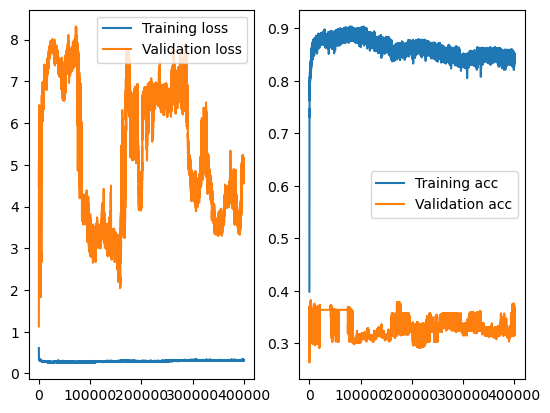

In [50]:
###Now training using linear interpolation results w/o amsgrad


import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,),  
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=35, output_activation='sigmoid')
training_loss=[]
validation_loss=[]
training_acc=[]
validation_acc=[] 
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=65596.93677367667e-7,beta_1=0.838518587915633 ,beta_2=0.3984271570599476,amsgrad=False),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=400000, 
                    verbose=0,batch_size=32)
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])
training_acc.append(history.history['accuracy'])
validation_acc.append(history.history['val_accuracy'])

plt.subplot(121)
plt.plot(np.linspace(0,400000,400000),np.array(training_loss).reshape(-1,1),label='Training loss')
plt.plot(np.linspace(0,400000,400000),np.array(validation_loss).reshape(-1,1),label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,400000,400000),np.array(training_acc).reshape(-1,1),label='Training acc')
plt.plot(np.linspace(0,400000,400000),np.array(validation_acc).reshape(-1,1),label='Validation acc')
plt.legend()

Text(0, 0.5, 'Learning rate')

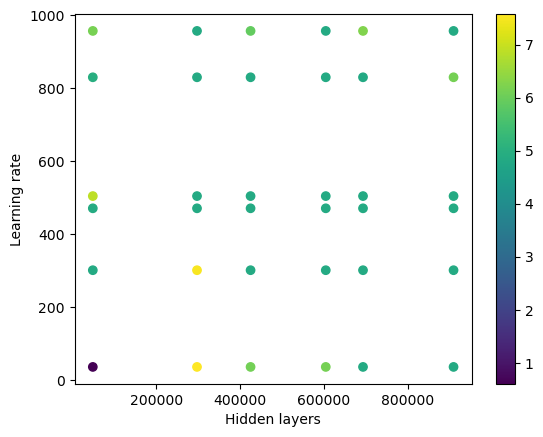

In [80]:
###for tanh activation

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_tanh_loss = np.zeros((len(X), len(X)))
grid_tanh_acc = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=int(Y[indA,indH]), output_activation='tanh')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=X[indA,indH]*1e-7),
                      loss=loss_func,
                      metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=1000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_tanh_loss[indA,indH] = np.mean(batch_loss)
        grid_tanh_acc[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_tanh_loss, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')



48028.291434851526 36.831494228337554


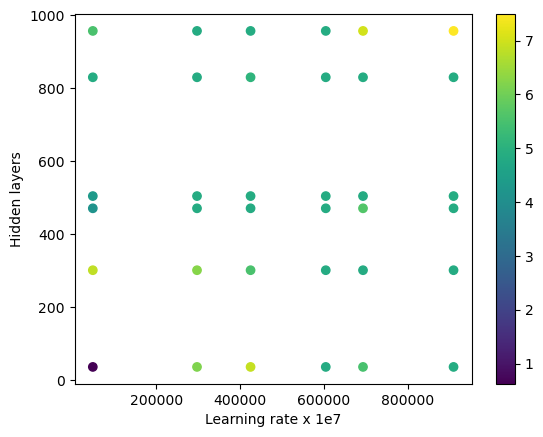

In [148]:
plt.scatter(X, Y, c=grid_tanh_loss, cmap='viridis')  
plt.colorbar()       
plt.ylabel('Hidden layers')
plt.xlabel('Learning rate x 1e7')
ind=np.argmin(grid_tanh_loss.flatten())
print(X.flatten()[ind],Y.flatten()[ind])

Text(0, 0.5, 'Learning rate')

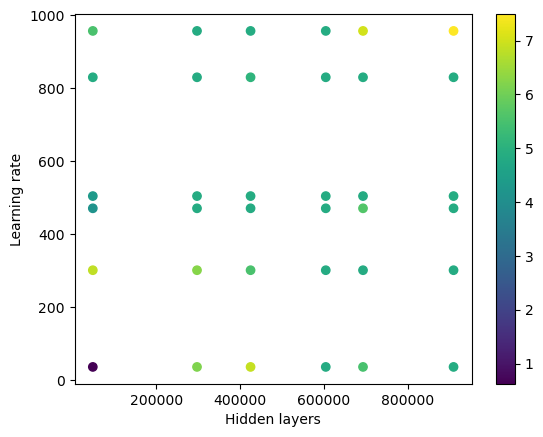

In [94]:
###for tanh activation

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_tanh_loss = np.zeros((len(X), len(X)))
grid_tanh_acc = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=int(Y[indA,indH]), output_activation='tanh')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=X[indA,indH]*1e-7),
                      loss=loss_func,
                      metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=1000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_tanh_loss[indA,indH] = np.mean(batch_loss)
        grid_tanh_acc[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_tanh_loss, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')



Text(0, 0.5, 'Learning rate')

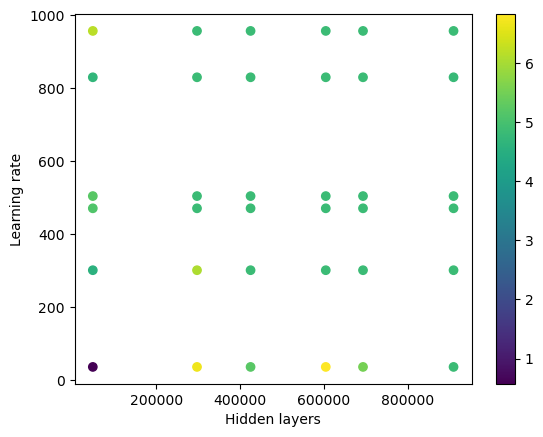

In [122]:
###for tanh activation

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_tanh_loss2 = np.zeros((len(X), len(X)))
grid_tanh_acc2 = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=int(Y[indA,indH]), output_activation='tanh')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=X[indA,indH]*1e-7),
                      loss=loss_func,
                      metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=1000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_tanh_loss2[indA,indH] = np.mean(batch_loss)
        grid_tanh_acc2[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_tanh_loss2, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')



In [149]:
ind=np.argmin(grid_tanh_loss2.flatten())
print(X.flatten()[ind],Y.flatten()[ind])

48028.291434851526 36.831494228337554


48028.291434851526 36.831494228337554


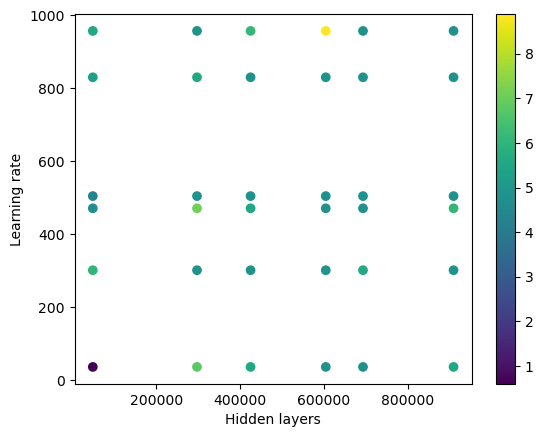

In [150]:
###for tanh activation

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_tanh_loss3 = np.zeros((len(X), len(X)))
grid_tanh_acc3 = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=int(Y[indA,indH]), output_activation='tanh')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=X[indA,indH]*1e-7),
                      loss=loss_func,
                      metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=1000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_tanh_loss3[indA,indH] = np.mean(batch_loss)
        grid_tanh_acc3[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_tanh_loss3, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')
ind=np.argmin(grid_tanh_loss3.flatten())
print(X.flatten()[ind],Y.flatten()[ind])


[[424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]
 [424551.3467467  296709.16789902  48028.29143485 604041.7475314
  908985.91303728 692912.78859367]] [[830.23248533 830.23248533 830.23248533 830.23248533 830.23248533
  830.23248533]
 [ 36.83149423  36.83149423  36.83149423  36.83149423  36.83149423
   36.83149423]
 [471.33205398 471.33205398 471.33205398 471.33205398 471.33205398
  471.33205398]
 [957.21972625 957.21972625 957.21972625 957.21972625 957.21972625
  957.21972625]
 [301.77438203 301.77438203 301.77438203 301.77438203 301.77438203


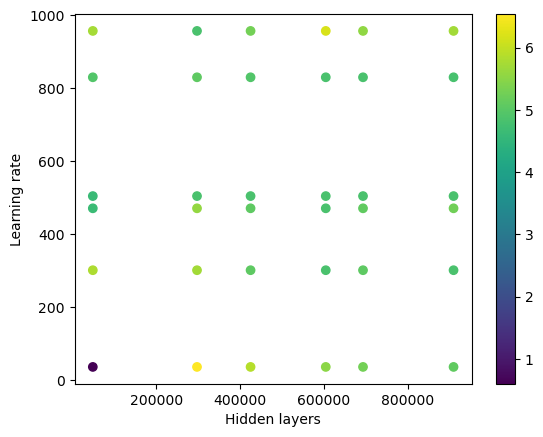

In [152]:
final_tanh=1/3*(grid_tanh_loss+grid_tanh_loss2+grid_tanh_loss3)

plt.scatter(X, Y, c=final_tanh, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')
print(X,Y,final_tanh)
ind=np.argmin(final_tanh.flatten())
print(X.flatten()[ind],Y.flatten()[ind])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


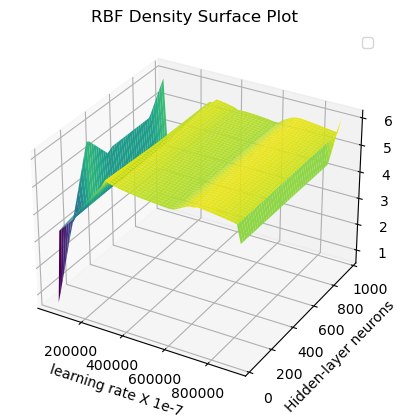

48026.291434851526 34.831494228337554


In [146]:
##for interpolation, its easier to just use scipy.interpolate , but could also do it as above to get the pdf values at the inteprolated points and then color them like that

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D


x_data = X
y_data = Y
z_data = final_tanh

# Fit RBF
rbf = Rbf(x_data, y_data, z_data,function='linear')  # You can choose 'linear', 'cubic', etc.

# Create grid for evaluation
grid_x, grid_y = np.linspace(np.min(x_data)-2, np.max(x_data)+2, 50), np.linspace(np.min(y_data)-2, np.max(y_data)+2, 50)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_z = rbf(grid_x, grid_y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')


ax.set_xlabel('learning rate X 1e-7')
ax.set_ylabel('Hidden-layer neurons')
ax.set_title('RBF Density Surface Plot')
plt.legend()
plt.show()
ind=np.argmin(grid_z.flatten())
print(grid_x.flatten()[ind],grid_y.flatten()[ind])

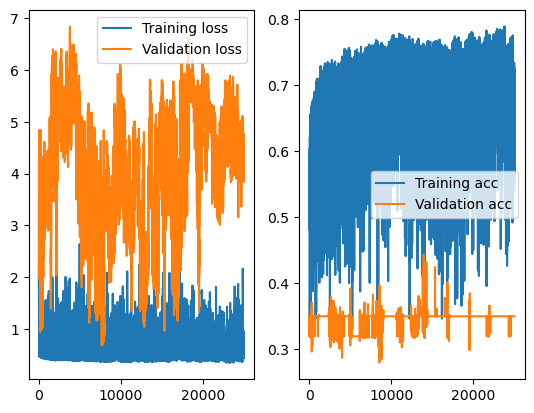

In [143]:

###NOW we train the semi-tuned simoid NN on average values( using mean value from raw samples provided better accuracy than 
##rbf interpolated point. Howveer, generalisation gap is similar in both cases)
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,),  
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=37, output_activation='tanh')
training_loss=[]
validation_loss=[]
training_acc=[]
validation_acc=[] 
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=48028.291434851526e-7),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=25000, 
                    verbose=0,batch_size=32)
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])
training_acc.append(history.history['accuracy'])
validation_acc.append(history.history['val_accuracy'])

plt.subplot(121)
plt.plot(np.linspace(0,25000,25000),np.array(training_loss).reshape(-1,1),label='Training loss')
plt.plot(np.linspace(0,25000,25000),np.array(validation_loss).reshape(-1,1),label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,25000,25000),np.array(training_acc).reshape(-1,1),label='Training acc')
plt.plot(np.linspace(0,25000,25000),np.array(validation_acc).reshape(-1,1),label='Validation acc')
plt.legend()

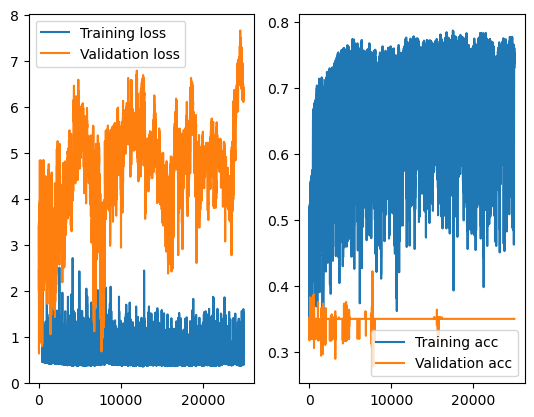

In [147]:

###now training the tanh model on the linear interpolation ideal parameters
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,),  
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=35, output_activation='tanh')
training_loss=[]
validation_loss=[]
training_acc=[]
validation_acc=[] 
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=48026.291434851526e-7),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=25000, 
                    verbose=0,batch_size=32)
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])
training_acc.append(history.history['accuracy'])
validation_acc.append(history.history['val_accuracy'])

plt.subplot(121)

plt.plot(np.linspace(0,25000,25000),np.array(training_loss).reshape(-1,1),label='Training loss')
plt.plot(np.linspace(0,25000,25000),np.array(validation_loss).reshape(-1,1),label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,25000,25000),np.array(training_acc).reshape(-1,1),label='Training acc')
plt.plot(np.linspace(0,25000,25000),np.array(validation_acc).reshape(-1,1),label='Validation acc')
plt.legend()

In [153]:
####from all these experiments and comparing the generalisation gaps in the tanh models vs the sigmoid models, the tanh
##with values from the grid search /linear (performed similarly whereas for sigmoid the linear interpolation performed better)
##now we perform cross validation to optimizer adam parameters(beta 1 and beta 2 as well as a switch between AMSgrad version vs 
##std)

100


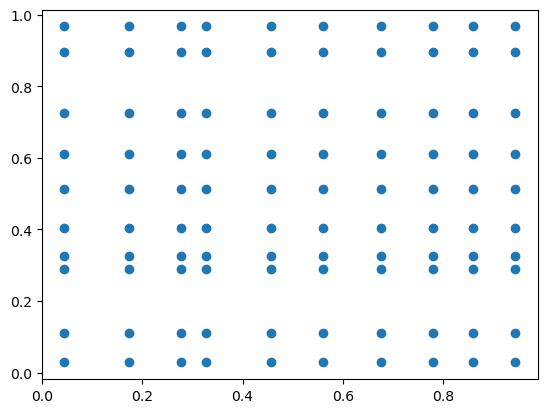

In [159]:
from scipy.stats import qmc
hyper=qmc.LatinHypercube(d=2)
samples=hyper.random(10)
upper=[1,1]
lower=[1e-3,1e-3]
scaled=qmc.scale(samples,lower,upper)
X,Y=np.meshgrid(scaled[:,0],scaled[:,1])
print(len(X.flatten()))
plt.scatter(X,Y)

In [ ]:
###for tanh activation

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Add Input layer
        tf.keras.layers.Dense(hidden_units, activation='tanh', 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                               kernel_initializer='random_normal', 
                               bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


grid_tanh_loss1 = np.zeros((len(X), len(X)))
grid_tanh_acc1 = np.zeros((len(X), len(X)))

kf = KFold(n_splits=5, shuffle=True)



for indH in range(len(X)):
    for indA in range(len(X)):
        # Create model
        model = build_model(input_dim=12, hidden_units=37, output_activation='tanh')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=48026.291434851526*1e-7,beta_1=X[indA,indH],beta_2=X[indA,indH],amsgrad=False),
                      loss=loss_func,
                      metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=6000, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_tanh_loss1[indA,indH] = np.mean(batch_loss)
        grid_tanh_acc1[indA,indH] = np.mean(ave_acc)

plt.scatter(X, Y, c=grid_tanh_loss1, cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')
ind=np.argmin(grid_tanh_loss1.flatten())
print(X.flatten()[ind],Y.flatten()[ind])


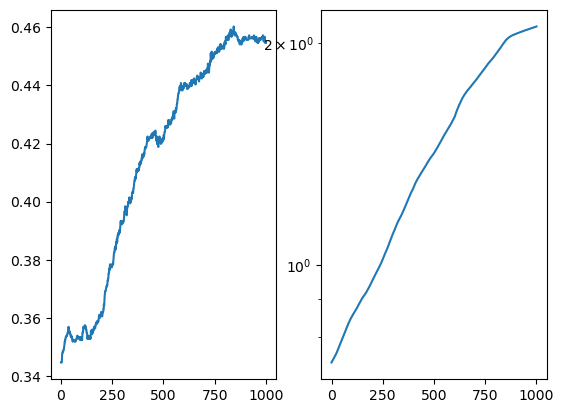

In [44]:

###NOW we train the semi-tuned simoid NN on average values
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,), 
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))


model = build_model(input_dim=12, hidden_units=933, output_activation='sigmoid')
batch_loss=[]
ave_acc=[]
# Compile model with Adam optimizer and custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-7),
              loss=loss_func,
              metrics=['accuracy'])
history = model.fit(inputs_training, labels_training, 
                    validation_data=(inputs_valid, labels_valid),
                    epochs=1000, 
                    verbose=0)
batch_loss.append(history.history['val_loss'])
ave_acc.append(history.history['accuracy'])

plt.subplot(121)
plt.plot(np.linspace(0,1000,1000),np.array(ave_acc).reshape(-1,1))
plt.subplot(122)
plt.semilogy(np.linspace(0,1000,1000),np.array(batch_loss).reshape(-1,1))

387.2202641963959


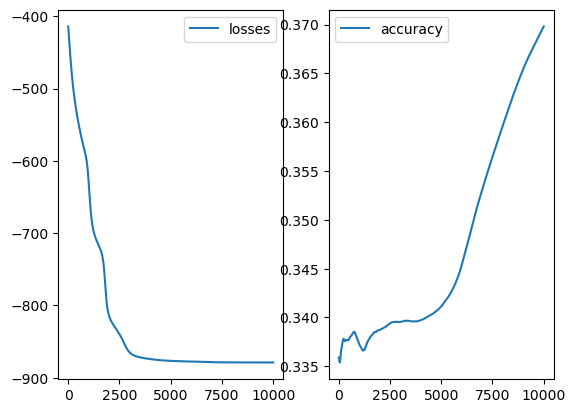

In [5]:
###now creating the NN 
import time 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
start=time.time()
accuracy_metric = tf.keras.metrics.Accuracy()
class NN(tf.keras.Model):
    def __init__(self,inputs,no_of_hidden_layer_neurons,output_activation):
        super (NN,self).__init__()
        self.Dense1=tf.keras.layers.Dense(12,activation='tanh', 
                                         kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                         bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
        self.Dense2=tf.keras.layers.Dense(no_of_hidden_layer_neurons,activation='tanh',
                                         kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                         bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
        self.Dense3=tf.keras.layers.Dense(3,activation=output_activation,
                                         kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                         bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
    def call(self,inputs,training=False):
        x=self.Dense1(inputs)
        x=self.Dense2(x)
        return self.Dense3(x)
    
class GDOptimizer:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate

    def apply_gradients(self, gradient_variable_pairs):##using this definition will make this optimizer interchangeable with others
        for gradient, variable in gradient_variable_pairs:
            new_value = variable - self.learning_rate * gradient
            variable.assign(new_value)
            
def loss_func(ytrue,ypred):
    return tf.reduce_sum(-0.5*ypred*ytrue)

def training(model,inputs,labels,loss_object,optimizer,accuracy_metric):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_func(labels, predictions)
    gradients=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    accuracy_metric.update_state(tf.argmax(labels, axis=-1), tf.argmax(predictions, axis=-1))
    accuracy = accuracy_metric.result().numpy()
    return loss,accuracy

# optimizer = GDOptimizer(learning_rate=0.1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00003)


###Now we train to test if all works
function_losses=[]
accuracies=[]
ite=10000
input_dim = train_feat.shape[1]
model=NN(input_dim,no_of_hidden_layer_neurons=100,output_activation='sigmoid')
for epoch in range(ite):
    loss,accuracy=training(model,inputs,labels,loss_func,optimizer,accuracy_metric)
    accuracies.append(accuracy)
    function_losses.append(loss)
plt.subplot(121)
plt.plot(np.linspace(0,ite,ite),function_losses,label='losses')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0,ite,ite),accuracies,label='accuracy')
plt.legend()
plt.subplots_adjust(hspace=0.5) 
end=time.time()
print(end-start)

In [6]:
##Verifying the architecture of the NN ( seems like first layer connects to another layer of the same size and then on 
##to the rest, seems like how inputs are registered but its of no manjro consequence. may just be a convention that each layer must
##have a matrix defining a to and from connection 
for var in model.trainable_variables:
    print(f'Variable Name: {var.name}')
    print(f'Variable Shape: {var.shape}')
    print(f'Number of Parameters: {tf.reduce_prod(var.shape).numpy()}')
    print()

Variable Name: kernel
Variable Shape: (12, 12)
Number of Parameters: 144

Variable Name: bias
Variable Shape: (12,)
Number of Parameters: 12

Variable Name: kernel
Variable Shape: (12, 100)
Number of Parameters: 1200

Variable Name: bias
Variable Shape: (100,)
Number of Parameters: 100

Variable Name: kernel
Variable Shape: (100, 3)
Number of Parameters: 300

Variable Name: bias
Variable Shape: (3,)
Number of Parameters: 3



In [7]:
np.array(train_feat)

array([[-0.9       ,  0.44172676,  0.34667872, ..., -0.9       ,
         0.37651418, -0.62666354],
       [-0.04596972, -0.9       ,  0.14746334, ..., -0.9       ,
         0.33557373, -0.59190269],
       [-0.9       ,  0.40707793,  0.38196162, ..., -0.9       ,
        -0.23805265, -0.60712728],
       ...,
       [ 0.316602  , -0.9       ,  0.37035974, ..., -0.9       ,
         0.43447483, -0.24674425],
       [ 0.28661146,  0.48541075, -0.9       , ...,  0.68060672,
         0.5039356 ,  0.13011513],
       [ 0.39926119,  0.37718094, -0.9       , ...,  0.79644637,
         0.34109379,  0.16511136]])

In [9]:
ind=np.argmin(grid_sigmoid)
print(Search1.flatten()[ind],Search2.flatten()[ind],grid_sigmoid.flatten()[ind])

974.0 7.443803013251696e-06 -12865.1044921875


616.0 1e-08 3.6842586994171143


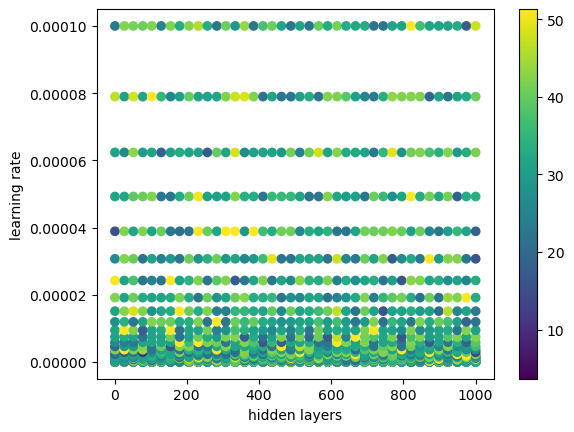

In [5]:
###now creating the NN using cross entropy and tanh activation and optimizing learning and hidden layers
import time 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
start=time.time()
accuracy_metric = tf.keras.metrics.Accuracy()
class NN(tf.keras.Model):
    def __init__(self,inputs,no_of_hidden_layer_neurons,output_activation):
        super (NN,self).__init__()
        self.Dense1=tf.keras.layers.Dense(12,activation='tanh', 
                                         kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                         bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
        self.Dense2=tf.keras.layers.Dense(no_of_hidden_layer_neurons,activation='tanh',
                                         kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                         bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
        self.Dense3=tf.keras.layers.Dense(3,activation=output_activation,
                                         kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                         bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
    def call(self,inputs,training=False):
        x=self.Dense1(inputs)
        x=self.Dense2(x)
        return self.Dense3(x)
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    loss = -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))
    return loss   
class GDOptimizer:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate

    def apply_gradients(self, gradient_variable_pairs):##using this definition will make this optimizer interchangeable with others
        for gradient, variable in gradient_variable_pairs:
            new_value = variable - self.learning_rate * gradient
            variable.assign(new_value)
         

def training(model,inputs,labels,loss_object,optimizer,accuracy_metric):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_func(labels, predictions)
    gradients=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    accuracy_metric.update_state(tf.argmax(labels, axis=-1), tf.argmax(predictions, axis=-1))
    accuracy = accuracy_metric.result().numpy()
    return loss,accuracy

grid_tanh_loss=np.zeros((40,40)) ##this grid will have the average accuracy from the validation fold of the 5 fold validation
grid_tanh_acc=np.zeros((40,40))
search1=np.round(np.linspace(1,1000,40),0)
search2=np.logspace(-8, -4, num=40) ## this one ensures even spacing for numbers on a small scale

Search1,Search2=np.meshgrid(search1,search2)

from sklearn.model_selection import KFold  ##here we are basically using batches to see which hyperparameter setting is best 
for indH,no_of_hidden_layer_neurons in enumerate(search1):
    for indA,learning_rate in enumerate(search2):
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model=NN(12,no_of_hidden_layer_neurons=int(no_of_hidden_layer_neurons),output_activation='tanh')
        ite=30
        kf=KFold(n_splits=5,shuffle=True)
        ave_acc=[0] ###moving average of acc over 30 ite to get idea of trajectory of optimziation(not fully training)
        batch_loss=[0]##same here
        for train_index ,valid_index in kf.split(np.array(train_feat)):
            train_fold,valid_fold,labels_train,labels_test=np.array(train_feat)[train_index],np.array(train_feat)[valid_index],bi_train_targ[train_index],bi_train_targ[valid_index]
            inputs_training = tf.convert_to_tensor(train_fold, dtype=tf.float32)
            inputs_testing = tf.convert_to_tensor(valid_fold, dtype=tf.float32)
            labels_testing = tf.convert_to_tensor(labels_test, dtype=tf.float32)
            labels_training= tf.convert_to_tensor(labels_train, dtype=tf.float32)
            for epoch in range(ite):
                loss,accuracy=training(model,inputs_training,labels_training,loss_func,optimizer,accuracy_metric)
                valid_preds=model(inputs_valid)
                valid_loss=loss_func(labels_valid,valid_preds)
                accuracy_metric.update_state(tf.argmax(labels_valid, axis=-1), tf.argmax(valid_preds, axis=-1))
                acc= accuracy_metric.result().numpy()
                batch_loss.append(np.mean(np.mean(batch_loss)+valid_loss))
                ave_acc.append(np.mean(np.mean(ave_acc)+acc))
        grid_tanh_loss[indH,indA]=np.array(tf.reduce_mean(batch_loss))
        grid_tanh_acc[indH,indA]=np.array(tf.reduce_mean(ave_acc))
        
plt.scatter(Search1.flatten(),Search2.flatten(),c=grid_tanh_loss,cmap='viridis')  
plt.colorbar()       
plt.xlabel('hidden layers')
plt.ylabel('learning rate')
ind=np.argmin(grid_tanh_loss.flatten())
print(Search1.flatten()[ind],Search2.flatten()[ind],grid_tanh_loss.flatten()[ind])

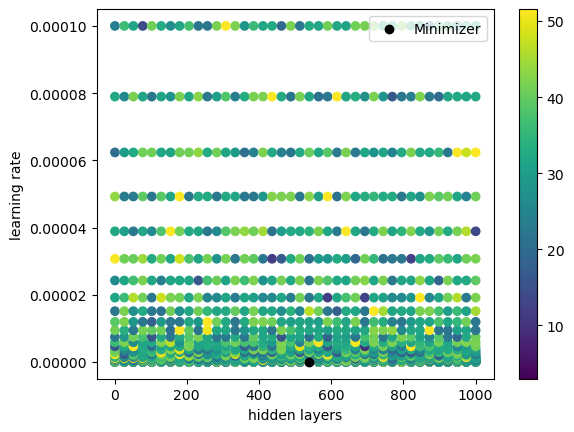

In [16]:
plt.scatter(Search1.flatten(),Search2.flatten(),c=grid_tanh_loss,cmap='viridis')  
plt.colorbar()       
plt.scatter(539,1e-8,c='k',label='Minimizer')
plt.xlabel('hidden layers')
plt.ylabel('learning rate')
plt.legend()

974.0 1e-08 3.5534846782684326


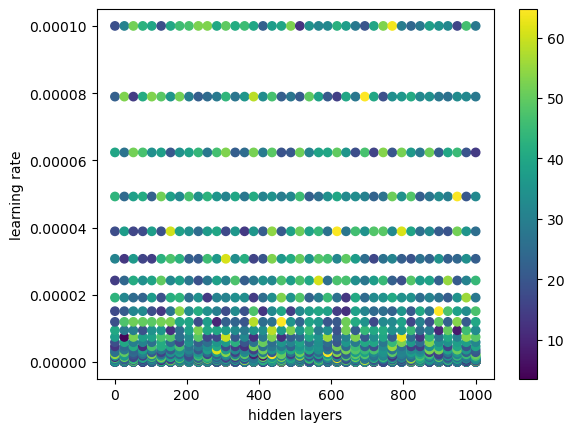

In [20]:
###now creating the NN using cross entropy and sigmoid activation and optimizing learning and hidden layers
import time 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
start=time.time()
accuracy_metric = tf.keras.metrics.Accuracy()
class NN(tf.keras.Model):
    def __init__(self,inputs,no_of_hidden_layer_neurons,output_activation):
        super (NN,self).__init__()
        self.Dense1=tf.keras.layers.Dense(12,activation='tanh', 
                                         kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                         bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
        self.Dense2=tf.keras.layers.Dense(no_of_hidden_layer_neurons,activation='tanh',
                                         kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                         bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
        self.Dense3=tf.keras.layers.Dense(3,activation=output_activation,
                                         kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                         bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
    def call(self,inputs,training=False):
        x=self.Dense1(inputs)
        x=self.Dense2(x)
        return self.Dense3(x)
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    loss = -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))
    return loss   
class GDOptimizer:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate

    def apply_gradients(self, gradient_variable_pairs):##using this definition will make this optimizer interchangeable with others
        for gradient, variable in gradient_variable_pairs:
            new_value = variable - self.learning_rate * gradient
            variable.assign(new_value)
         

def training(model,inputs,labels,loss_object,optimizer,accuracy_metric):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_func(labels, predictions)
    gradients=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    accuracy_metric.update_state(tf.argmax(labels, axis=-1), tf.argmax(predictions, axis=-1))
    accuracy = accuracy_metric.result().numpy()
    return loss,accuracy

grid_sig_loss=np.zeros((40,40)) ##this grid will have the average accuracy from the validation fold of the 5 fold validation
grid_sig_acc=np.zeros((40,40))
search1=np.round(np.linspace(1,1000,40),0)
search2=np.logspace(-8, -4, num=40) ## this one ensures even spacing for numbers on a small scale

Search1,Search2=np.meshgrid(search1,search2)

from sklearn.model_selection import KFold  ##here we are basically using batches to see which hyperparameter setting is best 
for indH,no_of_hidden_layer_neurons in enumerate(search1):
    for indA,learning_rate in enumerate(search2):
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model=NN(12,no_of_hidden_layer_neurons=int(no_of_hidden_layer_neurons),output_activation='sigmoid')
        ite=100
        kf=KFold(n_splits=5,shuffle=True)
        ave_acc=[0] ###moving average of acc over 30 ite to get idea of trajectory of optimziation(not fully training)
        batch_loss=[0]##same here
        for train_index ,valid_index in kf.split(np.array(train_feat)):
            train_fold,valid_fold,labels_train,labels_test=np.array(train_feat)[train_index],np.array(train_feat)[valid_index],bi_train_targ[train_index],bi_train_targ[valid_index]
            inputs_training = tf.convert_to_tensor(train_fold, dtype=tf.float32)
            inputs_testing = tf.convert_to_tensor(valid_fold, dtype=tf.float32)
            labels_testing = tf.convert_to_tensor(labels_test, dtype=tf.float32)
            labels_training= tf.convert_to_tensor(labels_train, dtype=tf.float32)
            for epoch in range(ite):
                loss,accuracy=training(model,inputs_training,labels_training,loss_func,optimizer,accuracy_metric)
                valid_preds=model(inputs_valid)
                valid_loss=loss_func(labels_valid,valid_preds)
                accuracy_metric.update_state(tf.argmax(labels_valid, axis=-1), tf.argmax(valid_preds, axis=-1))
                acc= accuracy_metric.result().numpy()
                batch_loss.append(np.mean(np.mean(batch_loss)+valid_loss))
                ave_acc.append(np.mean(np.mean(ave_acc)+acc))
        grid_sig_loss[indH,indA]=np.array(tf.reduce_mean(batch_loss))
        grid_sig_acc[indH,indA]=np.array(tf.reduce_mean(ave_acc))

        
plt.scatter(Search1.flatten(),Search2.flatten(),c=grid_sig_loss,cmap='viridis')  
plt.colorbar()       
plt.xlabel('hidden layers')
plt.ylabel('learning rate')
ind=np.argmin(grid_sig_loss.flatten())
print(Search1.flatten()[ind],Search2.flatten()[ind],grid_sig_loss.flatten()[ind])

Text(0, 0.5, 'learning rate')

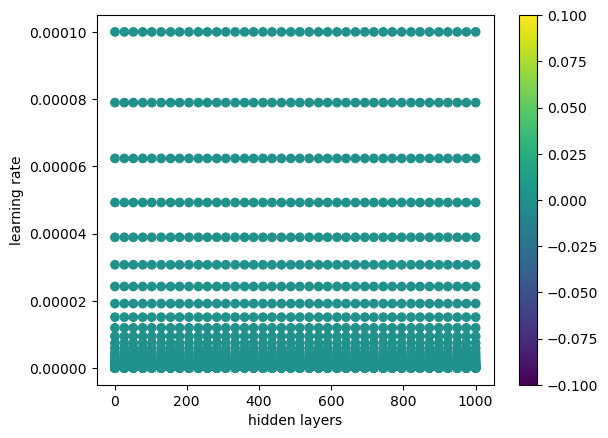

In [14]:
        
plt.scatter(Search1.flatten(),Search2.flatten(),c=grid_sig_loss,cmap='viridis')  
plt.colorbar()       
plt.xlabel('hidden layers')
plt.ylabel('learning rate')

In [1]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

start = time.time()

def build_model(input_dim, hidden_units, output_activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='tanh', input_shape=(input_dim,), 
                              kernel_initializer='random_normal', bias_initializer='random_normal'),
        tf.keras.layers.Dense(3, activation=output_activation, 
                              kernel_initializer='random_normal', bias_initializer='random_normal')
    ])
    return model

def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    return -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))

# Parameters for grid search
search1 = np.round(np.linspace(1, 1000, 40), 0)
search2 = np.logspace(-8, -4, num=40)
Search1, Search2 = np.meshgrid(search1, search2)

grid_sig_loss = np.zeros((40, 40))
grid_sig_acc = np.zeros((40, 40))

kf = KFold(n_splits=5, shuffle=True)



for indH, no_of_hidden_layer_neurons in enumerate(search1):
    for indA, learning_rate in enumerate(search2):
        # Create model
        model = build_model(input_dim=12, hidden_units=int(no_of_hidden_layer_neurons), output_activation='sigmoid')
        
        # Compile model with Adam optimizer and custom loss function
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss=loss_func,
                      metrics=['accuracy'])
        
        batch_loss = []
        ave_acc = []
        
        for train_index, valid_index in kf.split(train_feat):
            train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
            labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]
            
            history = model.fit(train_fold, labels_train, 
                                validation_data=(valid_fold, labels_valid),
                                epochs=100, 
                                verbose=0)
            
            # Collecting validation loss and accuracy
            batch_loss.append(np.mean(history.history['val_loss']))
            ave_acc.append(np.mean(history.history['val_accuracy']))
        grid_sig_loss[indH, indA] = np.mean(batch_loss)
        grid_sig_acc[indH, indA] = np.mean(ave_acc)

plt.scatter(Search1.flatten(), Search2.flatten(), c=grid_sig_loss.flatten(), cmap='viridis')  
plt.colorbar()       
plt.xlabel('Hidden layers')
plt.ylabel('Learning rate')
ind = np.argmin(grid_sig_loss.flatten())
print(Search1.flatten()[ind],
      Search2.flatten()[ind], grid_sig_loss.flatten()[ind])


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'train_feat' is not defined

In [77]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Define neural network model
class NN(tf.keras.Model):
    def __init__(self, no_of_hidden_layer_neurons, output_activation):
        super(NN, self).__init__()
        self.Dense1 = tf.keras.layers.Dense(12, activation='tanh', 
                                            kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                            bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
        self.Dense2 = tf.keras.layers.Dense(no_of_hidden_layer_neurons, activation='tanh',
                                            kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                            bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
        self.Dense3 = tf.keras.layers.Dense(3, activation=output_activation,
                                            kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0),
                                            bias_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))

    def call(self, inputs, training=False):
        x = self.Dense1(inputs)
        x = self.Dense2(x)
        return self.Dense3(x)

# Define the training function
def training(inputs, labels, model, loss_func, optimizer, accuracy_metric):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_func(labels, predictions)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    if gradients is None:
        raise ValueError("Gradients are None. Check your model and loss function.")
    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    accuracy_metric.update_state(tf.argmax(labels, axis=-1), tf.argmax(predictions, axis=-1))
    accuracy = accuracy_metric.result().numpy()  # Use .numpy() outside of @tf.function
    return loss.numpy(), accuracy

def loss_func(labels, predictions):
    epsilon = 1e-7
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    loss = -tf.reduce_mean(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))
    return loss

# Hyperparameter search
search1 = np.round(np.linspace(1, 1000, 40), 0)
search2 = np.logspace(-8, -4, num=40)
Search1, Search2 = np.meshgrid(search1, search2)

grid_sig_loss = np.zeros((40, 40))
grid_sig_acc = np.zeros((40, 40))

kf = KFold(n_splits=5, shuffle=True)

# Prepare data once
train_feat_array = np.array(train_feat)
bi_train_targ_array = np.array(bi_train_targ)

for indH, no_of_hidden_layer_neurons in enumerate(search1):
    for indA, learning_rate in enumerate(search2):
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model = NN(no_of_hidden_layer_neurons=int(no_of_hidden_layer_neurons), output_activation='sigmoid')
        
        ave_acc = []
        batch_loss = []
        
        for train_index, valid_index in kf.split(train_feat_array):
            # Convert numpy arrays to tensors for training
            train_fold = tf.convert_to_tensor(train_feat_array[train_index], dtype=tf.float32)
            valid_fold = tf.convert_to_tensor(train_feat_array[valid_index], dtype=tf.float32)
            labels_train = tf.convert_to_tensor(bi_train_targ_array[train_index], dtype=tf.float32)
            labels_valid = tf.convert_to_tensor(bi_train_targ_array[valid_index], dtype=tf.float32)

            accuracy_metric = tf.keras.metrics.Accuracy()
            for epoch in range(100):
                loss, accuracy = training(train_fold, labels_train, model, loss_func, optimizer, accuracy_metric)
                valid_preds = model(valid_fold, training=False)
                valid_loss = loss_func(labels_valid, valid_preds)
                
                accuracy_metric.update_state(tf.argmax(labels_valid, axis=-1), tf.argmax(valid_preds, axis=-1))
                acc = accuracy_metric.result().numpy()  # Use .numpy() outside of @tf.function
                
                batch_loss.append(valid_loss.numpy())  # Use .numpy() outside of @tf.function
                ave_acc.append(acc)
        grid_sig_loss[indH, indA] = np.mean(batch_loss)
        grid_sig_acc[indH, indA] = np.mean(ave_acc)

# Plotting results
plt.scatter(Search1.flatten(), Search2.flatten(), c=grid_sig_loss.flatten(), cmap='viridis')
plt.colorbar()
plt.xlabel('Hidden Layers')
plt.ylabel('Learning Rate')
ind = np.argmin(grid_sig_loss.flatten())
print(f"Best Parameters: Hidden Layers: {Search1.flatten()[ind]}, Learning Rate: {Search2.flatten()[ind]}, Loss: {grid_sig_loss.flatten()[ind]}")


KeyboardInterrupt: 

In [ ]:
ind=np.argmin(grid_sig_acc.flatten())
print(Search1.flatten()[ind],Search2.flatten()[ind],grid_sig_acc.flatten()[ind])

NOW we get distirbution stats for each cross validation set

In [13]:
nr_sig=[1.0608e-07 ,1.04e-8,1e-8,1e-8,1e-8]
print(np.mean(nr_sig),np.std(nr_sig))

2.9296000000000006e-08 3.839231256384538e-08


In [10]:
import scipy
sample=scipy.stats.norm.rvs(916.5,115.0945263685463)
sample

1000.1233526349549